# 0.0 Imports

## 0.1. Libries

In [115]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from nltk import tokenize

from sklearn.model_selection         import train_test_split
from sklearn.linear_model            import LogisticRegression as lr
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
from wordcloud import WordCloud

## 0.2. Load Data

In [116]:
df_raw = pd.read_csv('data/imdb-reviews-pt-br.csv')

## 0.3 Helper Functions

In [140]:
def classificar_texto(df, coluna_texto, target, n_features):

    #Modelo do tipo bag_of_words usando CountVectorizer
    vetorizar = CountVectorizer(lowercase=False, max_features = n_features)#max_features delimite o tamanho do vetor usado
    bag_of_words = vetorizar.fit_transform(df[coluna_texto])

    #separa treino e teste
    treino, teste, classse_treino, classe_teste = train_test_split(bag_of_words,
                                                                  df[target], 
                                                                  random_state = 42)
    #treinar modelo
    regressao_logistica = lr(solver = 'lbfgs')
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score( teste, classe_teste )

def nuvem_palavras(df, coluna_texto ):
    #lista com todas as palavras do campo text_pt
    todas_palavras = ' '.join([texto for texto in df[coluna_texto]])

    #WordCloud
    nuvem_palavras = WordCloud( width = 800, height = 500,
                                max_font_size = 110,
                              collocations = False ).generate(todas_palavras)
    
    #plotando grafico de palavras
    plt.figure(figsize=(20,18));
    plt.imshow(nuvem_palavras, interpolation = 'bilinear');
    plt.axis('off')
    plt.show();
    
def pareto(df, coluna_texto, quantidade):
    todas_palavras = ' '.join([resenha for resenha in df[coluna_texto]])
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencias = nltk.FreqDist(token_frase)
    df_frequencias = pd.DataFrame({'Palavras': list(frequencias.keys()),
                               'Frequencia': list(frequencias.values())})
    df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequencia')

    total = df_frequencias['Frequencia'].sum()
    df_frequencias['Porcentagem'] = df_frequencias['Frequencia'].cumsum() / total * 100

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequencias, x='Palavras', y='Frequencia', color='gray')
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequencias, x='Palavras', y='Porcentagem', color='red', sort=False, ax=ax2)
    plt.show()  

# 1.0. Data Description

In [118]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [119]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of Rows: 49459
Number of cols: 4


## 1.2. Data Types

In [120]:
df1.dtypes

id            int64
text_en      object
text_pt      object
sentiment    object
dtype: object

## 1.3. Check NA

In [121]:
df1.isna().sum()

id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64

# 2.0 Feature Engineering

In [122]:
df2 = df1.copy()

In [123]:
#coluna classificação, transformar valores de sentiment para binario
classificacao = df2['sentiment'].replace(['neg', 'pos'], [0,1])
df2['classificacao'] = classificacao

# 3.0 EAD

In [124]:
df3 = df2.copy()

In [125]:
df3.sample(5)

,id,text_en,text_pt,sentiment,classificacao
17505,17507,We saw this film in Toronto at the Film Festiv...,Nós vimos esse filme em Toronto no Festival de...,pos,1
10388,10390,"I say this. If you want to see art, you go to ...","Eu digo isso. Se você quer ver arte, você vai ...",neg,0
23340,23342,I am surprised by the relatively low rating th...,Estou surpreso com a classificação relativamen...,pos,1
37950,37952,"Warning! Mild Spoilers Ahead!Yes, I realize it...","Atenção! Mild Spoilers Ahead! Sim, eu percebo ...",pos,1
19542,19544,"""Hail The Woman"" is one of the most moving fil...","""Hail The Woman"" é um dos filmes mais emociona...",pos,1


## 3.1. Analisando text_pt

> Aqui vamos dar uma olhada em uma resenha que seja positiva e uma negativa, para ver os tipos de palavras usadas e pensar como o algortmo poderia reconhecer uma resenha como positiva ou negativa. 

In [126]:
#exemplo de resenha negativa
print('Negativa \n')
print(df3.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [127]:
#exemplo de resenha positiva
print('Positiva \n')
print(df3.text_pt[49002])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

## 3.2. Analisando variável alvo, classificacao

In [128]:
#Analisando o balanceamento
print(round(df3.classificacao.value_counts(normalize=True)*100, 2) )

0    50.07
1    49.93
Name: classificacao, dtype: float64


> Temos a variável alvo bem balanceada, com praticamente metade indicando respostas positivas e metade respostas negativas. 

## 3.3 WordCloud

### Todas as palavras

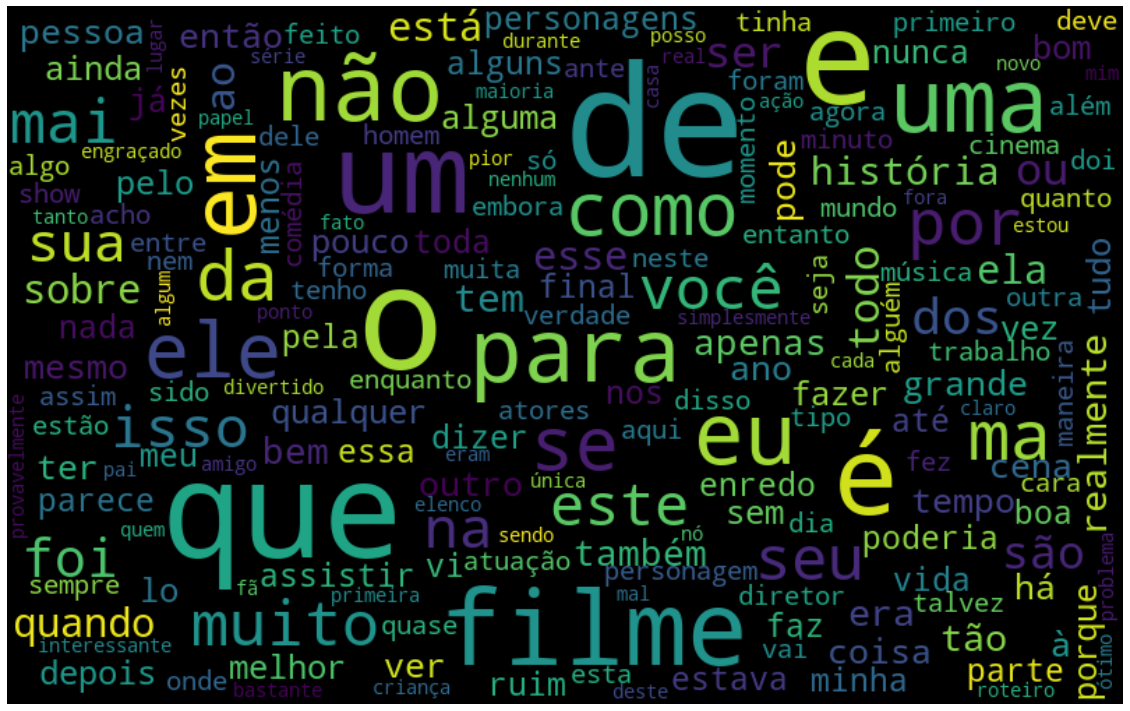

In [129]:
#Todas as palavras na wordcloud
nuvem_palavras(df3, 'text_pt')

### Palavras postivas

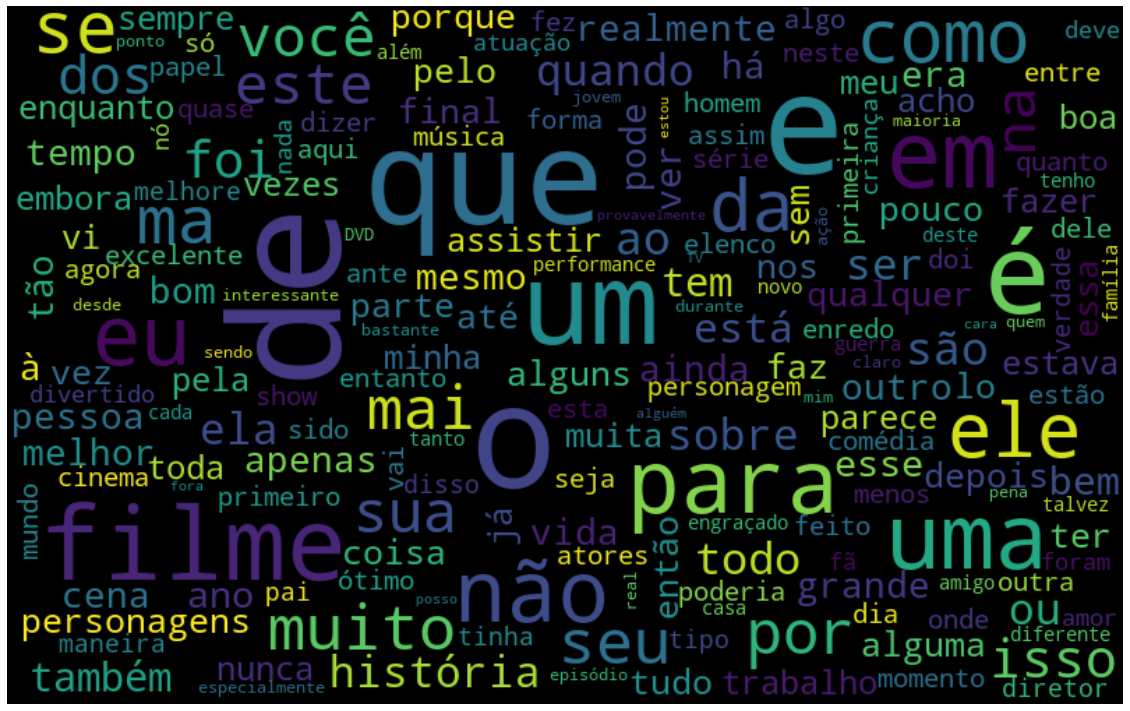

In [130]:
#palavras positivas
df_positivo = df3.loc[df3.classificacao == 1]
nuvem_palavras(df_positivo, 'text_pt')

### Palavras Negativas

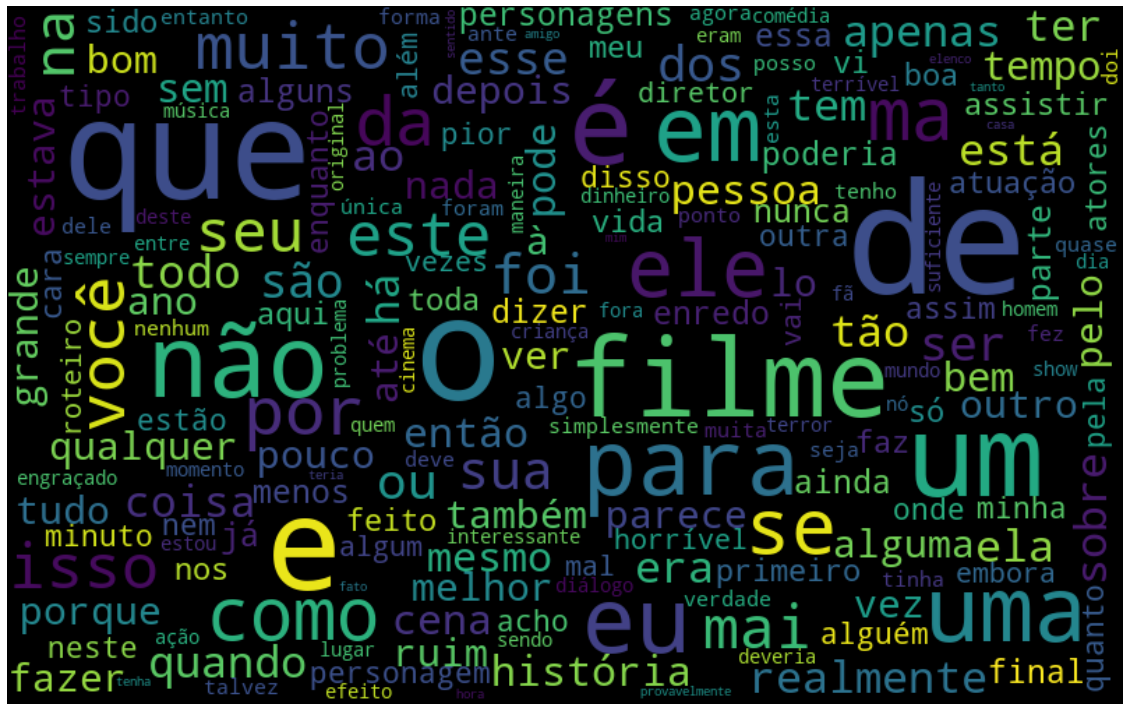

In [131]:
#palavras Negativas
df_negativo = df3.loc[df3.classificacao == 0]
nuvem_palavras(df_negativo, 'text_pt')

## 3.4 NLTK

In [132]:
#exemplo nltk frequencia
frase = ['um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia 

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [133]:
#exemplo tokenizacao usando nltk
frase = 'Bem vindo ao mundo PLN!'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase  = token_espaco.tokenize( frase )
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'PLN!']


In [134]:
#Tokenizano e achando a frequencia das palavaras no dataframe
todas_palavras = ' '.join([texto for texto in df3['text_pt']])
token_frase  = token_espaco.tokenize( todas_palavras )
frequencia = nltk.FreqDist(token_frase )
frequencia 

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [145]:
#DataFrame de frequencias de palavras
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                             'Frequencia': list(frequencia.values())})

df_frequencia.sort_values('Frequencia', ascending = False ).head(10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


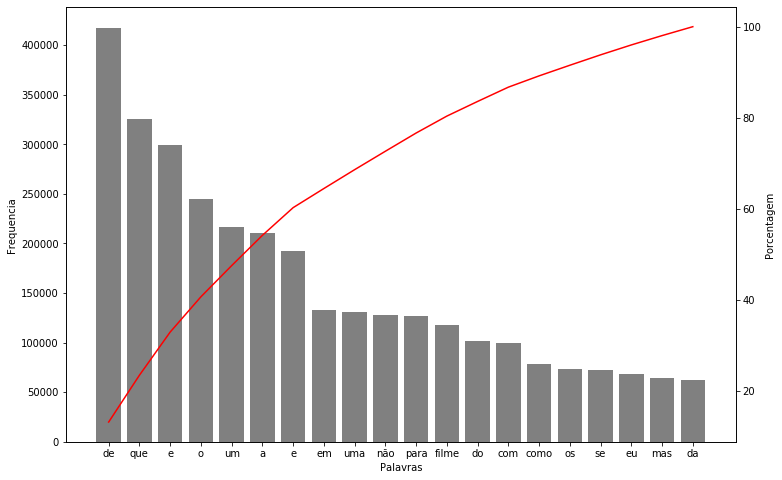

In [141]:
#Grafico de frequencia das palavras
pareto(df3, 'text_pt', 20)

# 4.0 Data Preparation

In [137]:
df4 = df3.copy()

# 5.0 Machine Learning

## 5.1 LogisticRegression - Bag of Words 

In [138]:
df5 = df4.copy()

>Usaremos o LogisticRegression como primeiro modelo para classificar os textos como boa avaliação ou ruim. 

> Para usarmos o LogisticRegression é necessário usar uma técnica de vetorização dos textos, foi usado o bag of words. 

In [139]:
acuracia = classificar_texto(df5, 'text_pt', 'classificacao', 200 )
print('Acuracia medida pelo score da regressao logistica é: ', acuracia)


Acuracia medida pelo score da regressao logistica é:  0.7534169025475131


> Neste primeiro ciclo, usando uma configuração de 200 para o tamanho da matriz do modelo de LogistcRegression, conseguimos obter uma acertividade de 75,34
